# 1. FizzBuzz

In [1]:
# 用"#"开始，这是一条注释。。。
n = 100 # n是一个变量名，100是整数数据类型
for i in range(1, n+1): # for循环，i从1开始循环到n结束
    if i % 15 == 0: # "%"是取模运算符，返回除法的余数，"if"是条件语句，这行代码判断i是否能被15整除（即余数为零）
        print(i, "FizzBuzz") # "print"语句可以打印多个内容，用“,”分隔
    elif i % 3 == 0:
        print(i, "Fizz") # "Fizz"是一个字符串数据类型
    elif i % 5 == 0:
        print(i, "Buzz")
    else:
        print(i)

1
2
3 Fizz
4
5 Buzz
6 Fizz
7
8
9 Fizz
10 Buzz
11
12 Fizz
13
14
15 FizzBuzz
16
17
18 Fizz
19
20 Buzz
21 Fizz
22
23
24 Fizz
25 Buzz
26
27 Fizz
28
29
30 FizzBuzz
31
32
33 Fizz
34
35 Buzz
36 Fizz
37
38
39 Fizz
40 Buzz
41
42 Fizz
43
44
45 FizzBuzz
46
47
48 Fizz
49
50 Buzz
51 Fizz
52
53
54 Fizz
55 Buzz
56
57 Fizz
58
59
60 FizzBuzz
61
62
63 Fizz
64
65 Buzz
66 Fizz
67
68
69 Fizz
70 Buzz
71
72 Fizz
73
74
75 FizzBuzz
76
77
78 Fizz
79
80 Buzz
81 Fizz
82
83
84 Fizz
85 Buzz
86
87 Fizz
88
89
90 FizzBuzz
91
92
93 Fizz
94
95 Buzz
96 Fizz
97
98
99 Fizz
100 Buzz


# 2. 绘制正弦波—认识numpy和matplotlib库
$y = sin(2\pi f t)$ where f = 440Hz

# 常用numpy命令：
1. ```a = np.zeros(2)```: 返回一个长度为10的数组，并用0填充，即：`[0, 0]`
2. ```b = np.ones(3)```: 返回一个长度为10的数组，并用1填充，即：`[1, 1, 1]`
3. ```c = np.concatenate([a, b])```: 将两个数组拼接起来，即: `[0, 0, 1, 1, 1]`
4. ```c[2] = 5```: 将c中的第3个元素赋值为5，即：`[0, 0, 5, 1, 1]`
5. ```c[1:4] = c[1:4]/5```: 将c中第2个到第4个元素除以5并将结果存入第2个到第4个元素，即`[0, 0, 1, 0.2, 1]`

In [2]:
import numpy as np # 载入numpy库

a = np.zeros(2)
print(a)
b = np.ones(3)
print(b)
c = np.concatenate([a, b])
print(c)
c[2] = 5 # 注意，numpy的索引是从0开始的，即c[0]是c数组中的第一个元素，c[1]是第二个，这个规则和c语言一样，而matlab语言则是从1开始的。
print(c)
c[1:4] = c[1:4]/5 # 注意：numpy的索引和for循环的range有些类似，也不包含结束的索引，即c[1:4]不是第1个到第5个，而是第1个到第4个。
print(c)

[0. 0.]
[1. 1. 1.]
[0. 0. 1. 1. 1.]
[0. 0. 5. 1. 1.]
[0.  0.  1.  0.2 1. ]


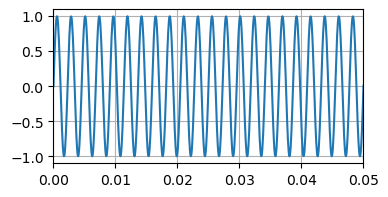

In [3]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 16000)  # np.linspace返回一个numpy数组，包含在指定间隔内均匀分布的数字（时间从0到1，采样频率16000Hz）。
signal = np.sin(2 * np.pi * 440 * t)  # 正弦波的定义, np.sin逐元素计算三角正弦，np.pi是numpy内置的圆周率常数

plt.figure(figsize=(4, 2)) # 定义绘图的大小（宽, 高以英寸为单位）
plt.plot(t, signal) # 绘制函数图像，点或线的横纵坐标由t和signal两个numpy数组给出
plt.xlim([0, 0.05]) # 限制横坐标轴的最大值和最小值
plt.grid() # 显示网格线（非必需）
plt.show() # 显示图像

In [4]:
from scipy.io import wavfile
wavfile.write('sin440.wav', 16000, (signal*32767).astype(np.int16)) # 将正弦波存储为wav音频文件

In [5]:
from IPython.display import Audio

Audio('sin440.wav') # 在notebook中播放wav音频文件

# 3. 拍频现象

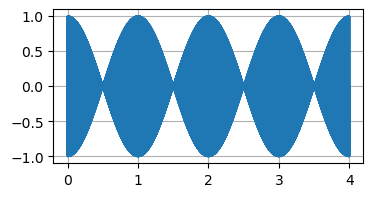

In [6]:
import numpy as np
import matplotlib.pyplot as plt
fs = 16000
t = np.linspace(0, 4, fs*4)  # Time from 0 to 1 second
signal_1 = np.sin(2 * np.pi * 440 * t)  # sine wave 1
signal_2 = np.sin(2 * np.pi * 441 * t)  # sine wave 2

signal = 0.5*signal_1 + 0.5*signal_2 # 两个频率相近的正弦波叠加

plt.figure(figsize=(4, 2))
plt.plot(t, signal)
plt.grid() 
plt.show() 

In [7]:
from scipy.io import wavfile
wavfile.write('beats.wav', 16000, (signal*32767).astype(np.int16)) # 将正弦波存储为wav音频文件
from IPython.display import Audio

Audio('beats.wav') # 在notebook中播放wav音频文件

# 4. FFT快速傅里叶变换

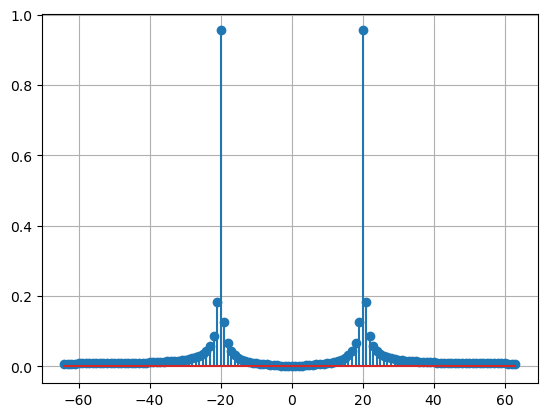

In [8]:
fs = 128
f = 20
t = np.linspace(0, 1, fs)  # 时间从0到1，采样频率16000Hz
signal = np.sin(2 * np.pi * f * t)  # 正弦波的定义, 频率10Hz

N = signal.shape[0] # Number of sample points

T = 1.0 / fs # Sample spacing
yf = np.fft.fft(signal,N) # 计算N点FFT
plt.stem(np.fft.fftfreq(N, T), 2/N*np.abs(yf)) # 绘制FFT图像
plt.grid()
plt.show()

# 5. 自娱自乐练习，用python合成一段音乐吧

In [9]:
import numpy as np
duration = 1
fs = 22050

t2 = np.arange(int(duration * fs)) / fs
t4 = np.arange(int(duration/2 * fs)) / fs
t48 = np.arange(int(duration/2 * fs)+int(duration/4 * fs)) / fs
t8 = np.arange(int(duration/4 * fs)) / fs

f_C = 261.63
f_D = 293.66
f_E = 329.63
f_F = 349.23
f_G = 392.00
f_A = 440.00
f_B = 493.88

note_sheet = [(f_E, t4),(f_E, t4),(f_F, t4),(f_G, t4),(f_G, t4),(f_F, t4),(f_E, t4),(f_D, t4),
              (f_C, t4),(f_C, t4),(f_D, t4),(f_E, t4),(f_E, t48),(f_D, t8),(f_D, t2),
              (f_E, t4),(f_E, t4),(f_F, t4),(f_G, t4),(f_G, t4),(f_F, t4),(f_E, t4),(f_D, t4),
              (f_C, t4),(f_C, t4),(f_D, t4),(f_E, t4),(f_D, t48),(f_C, t8),(f_C, t2)]
signal_notes = np.array([])

for note_info in note_sheet:
    f_note, t = note_info
    w = np.concatenate([np.linspace(0, 1, t.shape[0]//2), np.linspace(1, 0, t.shape[0] - t.shape[0]//2)])
    signal_notes = np.concatenate([signal_notes, w*np.sin(2 * np.pi * f_note * t)])  
signal = signal_notes

In [10]:
from scipy.io import wavfile
wavfile.write('Ode-to-Joy.wav', fs, (signal*32767).astype(np.int16))

from IPython.display import Audio

Audio('Ode-to-Joy.wav')